In [1]:
import tensorflow as tf

from tensorflow.keras import optimizers, regularizers
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

import numpy as np
import matplotlib.pyplot as plt

import os
import pandas as pd

In [2]:
train_dir = "C:/Users/juanp/OneDrive/Desktop/Nueva carpeta/train"
test_dir = "C:/Users/juanp/OneDrive/Desktop/Nueva carpeta/test"
validation_dir = "C:/Users/juanp/OneDrive/Desktop/Nueva carpeta/valid"

In [3]:
image_shape = (350,350,3)
N_CLASSES = 2
BATCH_SIZE = 256

train_datagen = ImageDataGenerator(dtype='float32', rescale= 1./255.)
train_generator = train_datagen.flow_from_directory(train_dir,
                                                   batch_size = BATCH_SIZE,
                                                   target_size = (350,350),
                                                   class_mode = 'categorical')

valid_datagen = ImageDataGenerator(dtype='float32', rescale= 1./255.)
valid_generator = valid_datagen.flow_from_directory(validation_dir,
                                                   batch_size = BATCH_SIZE,
                                                   target_size = (350,350),
                                                   class_mode = 'categorical')

test_datagen = ImageDataGenerator(dtype='float32', rescale = 1.0/255.0)
test_generator = test_datagen.flow_from_directory(test_dir,
                                                   batch_size = BATCH_SIZE,
                                                   target_size = (350,350),
                                                   class_mode = 'categorical')

Found 30250 images belonging to 2 classes.
Found 6300 images belonging to 2 classes.
Found 6300 images belonging to 2 classes.


In [11]:
weight_decay = 1e-3

first_model = Sequential([
    Conv2D(filters = 16 , kernel_size = 3, activation = 'relu', input_shape = image_shape), 
    BatchNormalization(),
    MaxPooling2D(pool_size = 2),
    Conv2D(filters = 32 , kernel_size = 3, activation = 'relu', input_shape = image_shape), 
    BatchNormalization(),
    MaxPooling2D(pool_size = 2),
    Conv2D(filters = 64 , kernel_size = 3, activation = 'relu', kernel_regularizer = regularizers.l2(weight_decay)),
    BatchNormalization(),
    MaxPooling2D(pool_size = 2),
    Dropout(0.4),
    Flatten(),
    Dense(300,activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(2,activation='softmax')
])

first_model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 348, 348, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 348, 348, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 174, 174, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 172, 172, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 172, 172, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 86, 86, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 84, 84, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 84, 84, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 42, 42, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 42, 42, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 112896)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 300)            │    33,869,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 300)            │         1,200 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 300)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 2)              │           602 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,894,934 (129.30 MB)

 Trainable params: 33,894,110 (129.30 MB)

 Non-trainable params: 824 (3.22 KB)

In [12]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

#checkpointer = ModelCheckpoint('first_model.hdf5',verbose=1, save_best_only= True)
early_stopping = EarlyStopping(monitor= 'val_loss', patience= 10)
optimizer = optimizers.Adam(learning_rate= 0.00001, decay= 1e-5)
first_model.compile(loss= 'categorical_crossentropy', optimizer= optimizer, metrics=['AUC','acc'])

In [14]:
history = first_model.fit(train_generator,
                    epochs = 30,
                    verbose = 1,
                    validation_data = valid_generator,
                    callbacks = [early_stopping])

Epoch 1/30
119/119 ━━━━━━━━━━━━━━━━━━━━ 759s 6s/step - AUC: 0.9512 - acc: 0.8922 - loss: 0.4069 - val_AUC: 0.7739 - val_acc: 0.5525 - val_loss: 0.9704
Epoch 2/30
119/119 ━━━━━━━━━━━━━━━━━━━━ 743s 6s/step - AUC: 0.9728 - acc: 0.9191 - loss: 0.2715 - val_AUC: 0.8367 - val_acc: 0.7262 - val_loss: 0.8418
Epoch 3/30
119/119 ━━━━━━━━━━━━━━━━━━━━ 743s 6s/step - AUC: 0.9805 - acc: 0.9318 - loss: 0.2250 - val_AUC: 0.9539 - val_acc: 0.9079 - val_loss: 0.3522
Epoch 4/30
119/119 ━━━━━━━━━━━━━━━━━━━━ 743s 6s/step - AUC: 0.9855 - acc: 0.9406 - loss: 0.1972 - val_AUC: 0.9825 - val_acc: 0.9362 - val_loss: 0.2123
Epoch 5/30
119/119 ━━━━━━━━━━━━━━━━━━━━ 777s 7s/step - AUC: 0.9882 - acc: 0.9473 - loss: 0.1797 - val_AUC: 0.9895 - val_acc: 0.9505 - val_loss: 0.1730
Epoch 6/30
119/119 ━━━━━━━━━━━━━━━━━━━━ 740s 6s/step - AUC: 0.9907 - acc: 0.9542 - loss: 0.1629 - val_AUC: 0.9895 - val_acc: 0.9510 - val_loss: 0.1712
Epoch 7/30
119/119 ━━━━━━━━━━━━━━━━━━━━ 736s 6s/step - AUC: 0.9926 - acc: 0.9583 - loss: 0.146

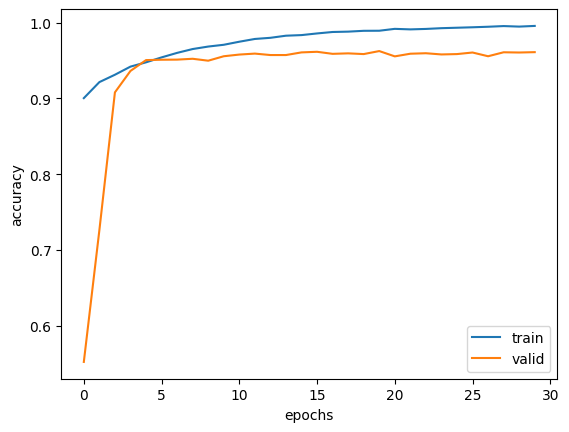

In [15]:
plt.plot(history.history['acc'], label = 'train',)
plt.plot(history.history['val_acc'], label = 'valid')

plt.legend(loc = 'lower right')
plt.xlabel('epochs')
plt.ylabel('accuracy')

plt.show()

In [16]:
first_model.save("Modelo_quelegustealuis.h5")

In [18]:
first_model.evaluate(test_generator)

C:\Users\juanp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


25/25 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - AUC: 0.9926 - acc: 0.9678 - loss: 0.1404


[0.1362311691045761, 0.993461012840271, 0.9703174829483032]